In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid
# Link directo: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-02-10 14:37:26--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [            <=>     ]  54.19M   569KB/s    in 1m 43s  

2020-02-10 14:39:16 (538 KB/s) - ‘airbnb-listings.csv’ saved [56826824]



In [ ]:
!ls -la

total 55516
drwxr-xr-x 1 root root     4096 Feb 10 14:37 .
drwxr-xr-x 1 root root     4096 Feb 10 14:35 ..
-rw-r--r-- 1 root root 56826824 Feb 10 14:39 airbnb-listings.csv
drwxr-xr-x 1 root root     4096 Feb  6 17:12 .config
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data


In [ ]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12768616,https://www.airbnb.com/rooms/12768616,20170407214050,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, car...",Centrally located in the atmospheric Gothic Qu...,"Unique apartment in vibrant neighborhoods, car...",none,Located on the edge of the Gothic Quarter of B...,NaN,The nearest station is Place de Catalunya a fe...,NaN,NaN,No pets or smoking allowed.,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,54310958,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,NaN,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,L'Antiga Esquerra de l'Eixample,207.0,207.0,"email,phone,reviews,jumio","El Gòtic, Barcelona, Catalunya 08002, Spain",El Gòtic,el Barri Gòtic,Ciutat Vella,Barcelona,Catalunya,...,2,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,349.0,NaN,NaN,NaN,NaN,1,0,2,1125,a week ago,NaN,2,2,2,2,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,92,NaN,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is..."
1,1629146,https://www.airbnb.com/rooms/1629146,20170407214050,2017-04-08,"Design, art & vintage / old city","If you're looking for a cool, spacious, light,...",The apartment is very comfortable and very tas...,"If you're looking for a cool, spacious, light,...",none,• A major advantage of this apartment is its l...,• Possibility of offering Premium Services suc...,• Nearest metro station is 1 min walk (Sant A...,Here's a list of of things we provide to our g...,==============================================...,* NO parties are allowed * NO noise on the st...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,8658841,https://www.airbnb.com/users/show/8658841,Olga & Co.,2013-09-05,"Barcelona, Catalonia, Spain","World traveller, currently living and working ...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/d67fdad1-e...,https://a0.muscache.com/im/pictures/d67fdad1-e...,El Raval,2.0,2.0,"email,phone,reviews,jumio","El Raval, Barcelona, Catalonia 08001, Spain",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,...,6,1.0,2.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,165.0,NaN,NaN,150.0,60.0,4,20,3,30,2 days ago,NaN,5,10,22,80,2017-04-08,110,2013-10-19,2017-03-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,strict,1,2.60,"41.3826627171,2.16755841626","Host Has Profile Pic,Host Identity Ve

In [ ]:
data.shape

(14001, 89)

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [ ]:
# Cargamos las imágenes en un array para tenerlas disponibles luego

In [ ]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
    except IOError as err:
        pass

Imagen 0 descargada
Imagen 1 descargada
Imagen 2 descargada
Imagen 3 descargada
Imagen 4 descargada
Imagen 5 descargada
Imagen 6 descargada
Imagen 7 descargada
Imagen 8 descargada
Imagen 9 descargada
Imagen 11 descargada
Imagen 12 descargada
Imagen 13 descargada
Imagen 14 descargada
Imagen 15 descargada
Imagen 16 descargada
Imagen 17 descargada
Imagen 18 descargada
Imagen 19 descargada
Imagen 20 descargada
Imagen 21 descargada
Imagen 22 descargada
Imagen 23 descargada
Imagen 24 descargada
Imagen 25 descargada
Imagen 26 descargada
Imagen 27 descargada
Imagen 29 descargada
Imagen 30 descargada
Imagen 32 descargada
Imagen 33 descargada
Imagen 34 descargada
Imagen 35 descargada
Imagen 36 descargada
Imagen 38 descargada
Imagen 39 descargada
Imagen 40 descargada
Imagen 41 descargada
Imagen 42 descargada
Imagen 43 descargada
Imagen 44 descargada
Imagen 45 descargada
Imagen 46 descargada
Imagen 48 descargada
Imagen 49 descargada
Imagen 50 descargada
Imagen 51 descargada
Imagen 52 descargada
Im

In [ ]:
# mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]
final_data.shape

(1000, 89)

### Preparamos las etiquetas

In [ ]:
# las etiquetas van a ser el precio para regresión
y_reg = final_data['Price']

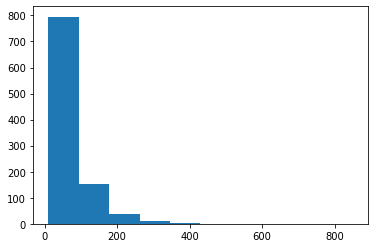

In [ ]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [ ]:
y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

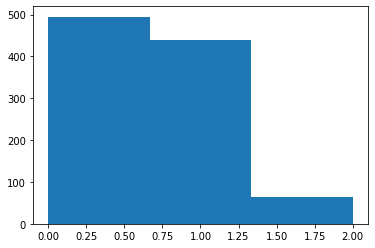

In [ ]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

In [ ]:
# cuanto más repartido esté la distribución (más balanceado) mejor podremos
# predecir nuestro problema

# Regresión con dataset numérico

In [ ]:
columnas_numericas = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Host Total Listings Count']
data_numerica = final_data.loc[:, columnas_numericas]
data_numerica.shape

(1000, 10)

In [ ]:
data_numerica.head(5)

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count
0,2,1.0,0.0,1.0,1,0,2,1125,0,207.0
1,6,1.0,2.0,3.0,4,20,3,30,110,2.0
2,5,1.0,2.0,2.0,3,20,2,60,89,18.0
3,5,1.0,2.0,2.0,1,0,2,1125,1,207.0
4,6,1.0,2.0,3.0,1,0,2,1125,5,207.0


### Estandarizamos variables numéricas

In [ ]:
# Estandarizamos los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaler = scaler.fit_transform(data_numerica)

In [ ]:
data_numerica.iloc[:] = numerical_scaler
data_numerica.head(5)

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count
0,-0.632977,-0.414245,-1.49849,-0.637500,-0.514379,-0.751341,-0.201918,0.516512,-0.614757,4.208811
1,1.402320,-0.414245,0.70888,0.611250,2.027856,1.086802,0.226783,-1.375290,1.956079,-0.339600
2,0.893495,-0.414245,0.70888,-0.013125,1.180444,1.086802,-0.201918,-1.323460,1.465283,0.015398
3,0.893495,-0.414245,0.70888,-0.013125,-0.514379,-0.751341,-0.201918,0.516512,-0.591386,4.208811
4,1.402320,-0.414245,0.70888,0.611250,-0.514379,-0.751341,-0.201918,0.516512,-0.497901,4.208811


In [ ]:
data_numerica.shape

(1000, 10)

### Procesamos variables categóricas

In [ ]:
data_categorica = final_data[['Property Type', 'Room Type', 'Cancellation Policy']]
data_categorica.head(5)

,Property Type,Room Type,Cancellation Policy
0,Apartment,Entire home/apt,strict
1,Apartment,Entire home/apt,strict
2,Apartment,Entire home/apt,moderate
3,Apartment,Entire home/apt,strict
4,Apartment,Entire home/apt,strict


In [ ]:
# convertimos a one-hot y eliminamos una variable para evitar colinealidad

# PropertyType
data_categorica_PT = pd.get_dummies(data_categorica['Property Type'], prefix='Property_Type')
data_categorica_PT.drop('Property_Type_Villa', axis=1, inplace=True)

# Room Type
data_categorica_RT = pd.get_dummies(data_categorica['Room Type'], prefix='Room_Type')
data_categorica_RT.drop('Room_Type_Shared room', axis=1, inplace=True)

# Cancellation Policy
data_categorica_CP = pd.get_dummies(data_categorica['Cancellation Policy'], prefix='Cancellation_Policy')
data_categorica_CP.drop('Cancellation_Policy_strict', axis=1, inplace=True)

# Juntamos los datos categóricos
data_categorica = pd.concat([data_categorica_PT, data_categorica_RT, data_categorica_CP], axis=1, join='inner')
data_categorica.shape

(1000, 19)

### Juntamos los datos numéricos y categóricos

In [ ]:
data_numerica

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count
0,-0.632977,-0.414245,-1.498490,-0.637500,-0.514379,-0.751341,-0.201918,0.516512,-0.614757,4.208811
1,1.402320,-0.414245,0.708880,0.611250,2.027856,1.086802,0.226783,-1.375290,1.956079,-0.339600
2,0.893495,-0.414245,0.708880,-0.013125,1.180444,1.086802,-0.201918,-1.323460,1.465283,0.015398
3,0.893495,-0.414245,0.708880,-0.013125,-0.514379,-0.751341,-0.201918,0.516512,-0.591386,4.208811
4,1.402320,-0.414245,0.708880,0.611250,-0.514379,-0.751341,-0.201918,0.516512,-0.497901,4.208811
...,...,...,...,...,...,...,...,...,...,...
1210,-0.632977,1.836663,-0.394805,-0.637500,-0.514379,0.351545,-0.201918,0.516512,-0.591386,-0.317413
1211,0.893495,-0.414245,-0.394805,0.611250,0.333033,0.627266,0.226783,0.516512,0.179865,-0.139914
1212,-0.124153,-0.414245,-0.394805,-0.013125,0.333033,-0.016084,-0.630619,0.516512,-0.614757,-0.339600
1214,-0.632977,-0.414245,-0.394805,-0.637500,-0.514379,-0.199898,0.226783,0.516512,-0.264188,-0.206476


In [ ]:
data_categorica

,Property_Type_Apartment,Property_Type_Bed & Breakfast,Property_Type_Chalet,Property_Type_Condominium,Property_Type_Dorm,Property_Type_Guesthouse,Property_Type_Hostel,Property_Type_House,Property_Type_Loft,Property_Type_Other,Property_Type_Serviced apartment,Property_Type_Tent,Property_Type_Townhouse,Room_Type_Entire home/apt,Room_Type_Private room,Cancellation_Policy_flexible,Cancellation_Policy_moderate,Cancellation_Policy_super_strict_30,Cancellation_Policy_super_strict_60
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1211,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1212,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1214,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
data = pd.concat([data_numerica, data_categorica], axis=1, join='inner')
print(data.shape)

(1000, 29)


### Tratamos los NaNs

In [ ]:
# tratamos los NaNs
data.isna().sum()

Accommodates                           0
Bathrooms                              2
Bedrooms                               2
Beds                                   1
Guests Included                        0
Extra People                           0
Minimum Nights                         0
Maximum Nights                         0
Number of Reviews                      0
Host Total Listings Count              0
Property_Type_Apartment                0
Property_Type_Bed & Breakfast          0
Property_Type_Chalet                   0
Property_Type_Condominium              0
Property_Type_Dorm                     0
Property_Type_Guesthouse               0
Property_Type_Hostel                   0
Property_Type_House                    0
Property_Type_Loft                     0
Property_Type_Other                    0
Property_Type_Serviced apartment       0
Property_Type_Tent                     0
Property_Type_Townhouse                0
Room_Type_Entire home/apt              0
Room_Type_Privat

In [ ]:
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].mean())
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].mean())
data['Beds'] = data['Beds'].fillna(data['Beds'].mean())

In [ ]:
data.isna().sum()

Accommodates                           0
Bathrooms                              0
Bedrooms                               0
Beds                                   0
Guests Included                        0
Extra People                           0
Minimum Nights                         0
Maximum Nights                         0
Number of Reviews                      0
Host Total Listings Count              0
Property_Type_Apartment                0
Property_Type_Bed & Breakfast          0
Property_Type_Chalet                   0
Property_Type_Condominium              0
Property_Type_Dorm                     0
Property_Type_Guesthouse               0
Property_Type_Hostel                   0
Property_Type_House                    0
Property_Type_Loft                     0
Property_Type_Other                    0
Property_Type_Serviced apartment       0
Property_Type_Tent                     0
Property_Type_Townhouse                0
Room_Type_Entire home/apt              0
Room_Type_Privat

# Clasificación con el dataset numérico

In [ ]:
# Vamos a comprobar qué tamaño de datos tenemos y cual es su rango
data.shape

(1000, 29)

In [ ]:
data.max(axis=0)

Accommodates                            6.490562
Bathrooms                              10.089994
Bedrooms                                9.538356
Beds                                    8.728132
Guests Included                        12.196796
Extra People                            8.898907
Minimum Nights                         10.086901
Maximum Nights                         15.849615
Number of Reviews                       7.705404
Host Total Listings Count               4.208811
Property_Type_Apartment                 1.000000
Property_Type_Bed & Breakfast           1.000000
Property_Type_Chalet                    1.000000
Property_Type_Condominium               1.000000
Property_Type_Dorm                      1.000000
Property_Type_Guesthouse                1.000000
Property_Type_Hostel                    1.000000
Property_Type_House                     1.000000
Property_Type_Loft                      1.000000
Property_Type_Other                     1.000000
Property_Type_Servic

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos


In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Using TensorFlow backend.


In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # tenemos 3 clases

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 720 samples, validate on 80 samples
Epoch 1/50





720/720 [==============================] - 1s 1ms/step - loss: 0.8157 - acc: 0.7125 - val_loss: 0.6917 - val_acc: 0.7625
Epoch 2/50
720/720 [==============================] - 0s 172us/step - loss: 0.6309 - acc: 0.7750 - val_loss: 0.6717 - val_acc: 0.7625
Epoch 3/50
720/720 [==============================] - 0s 175us/step - loss: 0.5971 - acc: 0.7736 - val_loss: 0.6577 - val_acc: 0.7625
Epoch 4/50
720/720 [==============================] - 0s 190us/step - loss: 0.5732 - acc: 0.7778 - val_loss: 0.6399 - val_acc: 0.7625
Epoch 5/50
720/720 [==============================] - 0s 171us/step - loss: 0.5496 - acc: 0.7819 - val_loss: 0.6321 - val_acc: 0.7500
Epoch 6/50
720/720 [==============================] - 0s 176us/step - loss: 0.5343 - acc: 0.7819 - val_loss: 0.6407 - val_acc: 0.7625
Epoch 7/50
720/720 [==========================

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

200/200 [==============================] - 0s 52us/step
Loss=0.57142080783844, Acc=0.78


Cómo podéis observar, obtenemos un accuracy de 78% en test, que no está nada mal para ser un ejemplo tan sencillo. Formas de mejorar incluirían:

- Regularización L1/L2
- Dropout
- Mayor complejidad de la red
- Entrenar durante más tiempo
- Recoger más datos (o hacer data augmentation si encontráis alguna forma de hacerlo)
- **Utilizar datos de diversas fuentes <-- Nos vamos a centrar en esto**

# Regresión con el dataset numérico

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos


In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print(y_reg_norm.min())
print(y_reg_norm.max())

0.0
1.0


In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 0s 463us/step - loss: 0.0083 - val_loss: 0.0113
Epoch 2/50
720/720 [==============================] - 0s 151us/step - loss: 0.0042 - val_loss: 0.0103
Epoch 3/50
720/720 [==============================] - 0s 144us/step - loss: 0.0037 - val_loss: 0.0102
Epoch 4/50
720/720 [==============================] - 0s 164us/step - loss: 0.0037 - val_loss: 0.0100
Epoch 5/50
720/720 [==============================] - 0s 153us/step - loss: 0.0035 - val_loss: 0.0102
Epoch 6/50
720/720 [==============================] - 0s 170us/step - loss: 0.0034 - val_loss: 0.0101
Epoch 7/50
720/720 [==============================] - 0s 147us/step - loss: 0.0033 - val_loss: 0.0094
Epoch 8/50
720/720 [==============================] - 0s 143us/step - loss: 0.0031 - val_loss: 0.0094
Epoch 9/50
720/720 [==============================] - 0s 153us/step - loss: 0.0030 - val_loss: 0.0096
Epoch 10/50
720/720 [================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

200/200 [==============================] - 0s 56us/step
Loss=0.0023802837915718553


In [ ]:
# Para tener una intuición real de cómo de bueno es nuestro modelo, tenemos que
# reescalar las predicciones y calcular el error nosotros mismos. 
# El reescalado es necesario por el min_max normalizado que hacemos para tener 
# los datos de 0 a 1. 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 23.85942397117615


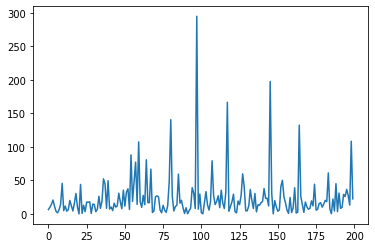

In [ ]:
# Esto significa que cometemos un error de unos 58€ al tratar de predecir una 
# vivienda.
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 25.00 Predicho: 31.62. Error: 6.62
Real: 45.00 Predicho: 34.90. Error: 10.10
Real: 85.00 Predicho: 70.45. Error: 14.55
Real: 30.00 Predicho: 9.13. Error: 20.87
Real: 60.00 Predicho: 71.59. Error: 11.59
Real: 25.00 Predicho: 21.10. Error: 3.90
Real: 18.00 Predicho: 19.72. Error: 1.72
Real: 100.00 Predicho: 93.42. Error: 6.58
Real: 45.00 Predicho: 30.13. Error: 14.87
Real: 24.00 Predicho: 69.68. Error: 45.68
Real: 70.00 Predicho: 65.03. Error: 4.97
Real: 35.00 Predicho: 46.78. Error: 11.78
Real: 25.00 Predicho: 29.15. Error: 4.15
Real: 30.00 Predicho: 23.53. Error: 6.47
Real: 40.00 Predicho: 19.81. Error: 20.19
Real: 25.00 Predicho: 37.41. Error: 12.41
Real: 25.00 Predicho: 20.52. Error: 4.48
Real: 37.00 Predicho: 20.67. Error: 16.33
Real: 150.00 Predicho: 119.44. Error: 30.56
Real: 30.00 Predicho: 40.38. Error: 10.38
Real: 90.00 Predicho: 89.89. Error: 0.11
Real: 115.00 Predicho: 70.88. Error: 44.12
Real: 40.00 Predicho: 39.00. Error: 1.00
Real: 25.00 Predicho: 11.85. Error: 13.15

In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 23.85942397117615
Error cuadrático medio: 1679.5282210601185


# Añadimos datos de imágenes


In [ ]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()


58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
___________________________________________________________

In [ ]:
# cuántas imágenes tenemos disponibles?
images.shape

(1000, 224, 224, 3)

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]

100%|██████████| 1000/1000 [09:02<00:00,  1.86it/s]


In [ ]:
images_feat.shape

(1000, 512)

In [ ]:
data.shape

(1000, 29)

In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_all = np.concatenate((data, images_feat), axis=1)
print(data_all.shape)

(1000, 541)


# Clasificación con solo imágenes

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 1s 808us/step - loss: 0.8970 - acc: 0.5125 - val_loss: 0.8385 - val_acc: 0.5875
Epoch 2/50
720/720 [==============================] - 0s 234us/step - loss: 0.7795 - acc: 0.6708 - val_loss: 0.7645 - val_acc: 0.6375
Epoch 3/50
720/720 [==============================] - 0s 236us/step - loss: 0.6904 - acc: 0.7056 - val_loss: 0.7303 - val_acc: 0.6750
Epoch 4/50
720/720 [==============================] - 0s 217us/step - loss: 0.6024 - acc: 0.7597 - val_loss: 0.7919 - val_acc: 0.6250
Epoch 5/50
720/720 [==============================] - 0s 213us/step - loss: 0.5283 - acc: 0.8042 - val_loss: 0.8109 - val_acc: 0.6500
Epoch 6/50
720/720 [==============================] - 0s 240us/step - loss: 0.4654 - acc: 0.8250 - val_loss: 0.8957 - val_acc: 0.5875
Epoch 7/50
720/720 [==============================] - 0s 252us/step - loss: 0.3706 - acc: 0.8694 - val_loss: 0.9268 - val_acc: 0.6250
Epoch 8/50
720/72

Fijaos que existe un overfitting importante. Vamos a tratar de mejorarlo añadiendo Dropout.

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 1s 999us/step - loss: 0.9249 - acc: 0.5083 - val_loss: 0.8897 - val_acc: 0.4500
Epoch 2/50
720/720 [==============================] - 0s 237us/step - loss: 0.8564 - acc: 0.5764 - val_loss: 0.8291 - val_acc: 0.6250
Epoch 3/50
720/720 [==============================] - 0s 213us/step - loss: 0.7817 - acc: 0.6417 - val_loss: 0.7786 - val_acc: 0.6625
Epoch 4/50
720/720 [==============================] - 0s 221us/step - loss: 0.7401 - acc: 0.6653 - val_loss: 0.7752 - val_acc: 0.6750
Epoch 5/50
720/720 [==============================] - 0s 217us/step - loss: 0.7328 - acc: 0.6903 - val_loss: 0.7614 - val_acc: 0.6875
Epoch 6/50
720/720 [==============================] - 0s 224us/step - loss: 0.6713 - acc: 0.7264 - val_loss: 0.8290 - val_acc: 0.6000
Epoch 7/50
720/720 [===============

Vamos a probar añadiendo regularización L1 para que ayude a la red a escoger las mejores características de nuestro vector de 512 elementos.

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=200,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Train on 720 samples, validate on 80 samples
Epoch 1/200
720/720 [==============================] - 1s 1ms/step - loss: 5.5358 - acc: 0.5000 - val_loss: 3.1812 - val_acc: 0.6375
Epoch 2/200
720/720 [==============================] - 0s 274us/step - loss: 2.2172 - acc: 0.5486 - val_loss: 1.5868 - val_acc: 0.6625
Epoch 3/200
720/720 [==============================] - 0s 273us/step - loss: 1.3291 - acc: 0.5500 - val_loss: 1.1756 - val_acc: 0.4375
Epoch 4/200
720/720 [==============================] - 0s 253us/step - loss: 1.1034 - acc: 0.5181 - val_loss: 1.0664 - val_acc: 0.4375
Epoch 5/200
720/720 [==============================] - 0s 240us/step - loss: 1.0267 - acc: 0.5264 - val_loss: 1.0155 - val_acc: 0.4375
Epoch 6/200
720/720 [==============================] - 0s 256us/step - loss: 0.9844 - acc: 0.5056 - val_loss: 0.9845 - val_acc: 0.4375
Epoch 7/200
720/720 [==============================] - 0s 247us/step - loss: 0.9570 - acc: 0.5056 - val_loss: 0.9615 - val_acc: 0.4375
Epoch 8/200


Concluimos que con estos datos es complicado obtener mejores resultados. Vamos a probar combinando.

# Regresión con solo imágenes

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.0082 - val_loss: 0.0105
Epoch 2/50
720/720 [==============================] - 0s 192us/step - loss: 0.0059 - val_loss: 0.0095
Epoch 3/50
720/720 [==============================] - 0s 198us/step - loss: 0.0053 - val_loss: 0.0098
Epoch 4/50
720/720 [==============================] - 0s 192us/step - loss: 0.0047 - val_loss: 0.0084
Epoch 5/50
720/720 [==============================] - 0s 205us/step - loss: 0.0041 - val_loss: 0.0095
Epoch 6/50
720/720 [==============================] - 0s 193us/step - loss: 0.0035 - val_loss: 0.0086
Epoch 7/50
720/720 [==============================] - 0s 191us/step - loss: 0.0030 - val_loss: 0.0092
Epoch 8/50
720/720 [==============================] - 0s 208us/step - loss: 0.0026 - val_loss: 0.0093
Epoch 9/50
720/720 [==============================] - 0s 228us/step - loss: 0.0022 - val_loss: 0.0095
Epoch 10/50
720/720 [==================

# Clasificación con todos los datos (numéricos + imágenes)

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.9068 - acc: 0.5514 - val_loss: 0.7469 - val_acc: 0.7875
Epoch 2/50
720/720 [==============================] - 0s 275us/step - loss: 0.6936 - acc: 0.7222 - val_loss: 0.6436 - val_acc: 0.7750
Epoch 3/50
720/720 [==============================] - 0s 248us/step - loss: 0.6028 - acc: 0.7667 - val_loss: 0.6204 - val_acc: 0.8000
Epoch 4/50
720/720 [==============================] - 0s 242us/step - loss: 0.5646 - acc: 0.7694 - val_loss: 0.6156 - val_acc: 0.7875
Epoch 5/50
720/720 [==============================] - 0s 242us/step - loss: 0.5013 - acc: 0.8014 - val_loss: 0.6759 - val_acc: 0.7625
Epoch 6/50
720/720 [==============================] - 0s 238us/step - loss: 0.4371 - acc: 0.8292 - val_loss: 0.6715 - val_acc: 0.8000
Epoch 7/50
720/720 [==============================] - 0s 250us/step - loss: 0.3996 - acc: 0.8361 - val_loss: 0.6374 - val_acc: 0.7750
Epoch 8/50
720/720 

# Regresión con todos los datos (numéricos + imágenes)

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 2/50
720/720 [==============================] - 0s 192us/step - loss: 0.0047 - val_loss: 0.0102
Epoch 3/50
720/720 [==============================] - 0s 189us/step - loss: 0.0040 - val_loss: 0.0101
Epoch 4/50
720/720 [==============================] - 0s 192us/step - loss: 0.0032 - val_loss: 0.0099
Epoch 5/50
720/720 [==============================] - 0s 202us/step - loss: 0.0027 - val_loss: 0.0102
Epoch 6/50
720/720 [==============================] - 0s 203us/step - loss: 0.0022 - val_loss: 0.0110
Epoch 7/50
720/720 [==============================] - 0s 202us/step - loss: 0.0017 - val_loss: 0.0108
Epoch 8/50
720/720 [==============================] - 0s 198us/step - loss: 0.0012 - val_loss: 0.0101
Epoch 9/50
720/720 [==============================] - 0s 202us/step - loss: 0.0011 - val_loss: 0.0107
Epoch 10/50
720/720 [==================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

200/200 [==============================] - 0s 124us/step
Loss=0.00250022042542696


In [ ]:
# Para tener una intuición real de cómo de bueno es nuestro modelo, tenemos que
# reescalar las predicciones y calcular el error nosotros mismos. 
# El reescalado es necesario por el min_max normalizado que hacemos para tener 
# los datos de 0 a 1. 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 26.00054524898529


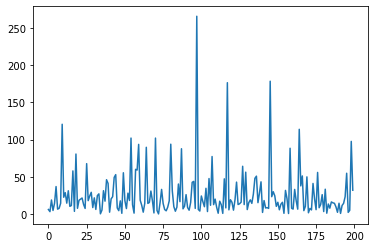

In [ ]:
# Esto significa que cometemos un error de unos 58€ al tratar de predecir una 
# vivienda.
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 25.00 Predicho: 19.05. Error: 5.95
Real: 45.00 Predicho: 48.06. Error: 3.06
Real: 85.00 Predicho: 66.28. Error: 18.72
Real: 30.00 Predicho: 25.35. Error: 4.65
Real: 60.00 Predicho: 74.33. Error: 14.33
Real: 25.00 Predicho: 61.76. Error: 36.76
Real: 18.00 Predicho: 11.61. Error: 6.39
Real: 100.00 Predicho: 107.54. Error: 7.54
Real: 45.00 Predicho: 30.60. Error: 14.40
Real: 24.00 Predicho: 144.51. Error: 120.51
Real: 70.00 Predicho: 92.41. Error: 22.41
Real: 35.00 Predicho: 63.54. Error: 28.54
Real: 25.00 Predicho: 39.47. Error: 14.47
Real: 30.00 Predicho: 61.12. Error: 31.12
Real: 40.00 Predicho: 29.80. Error: 10.20
Real: 25.00 Predicho: 36.22. Error: 11.22
Real: 25.00 Predicho: 82.80. Error: 57.80
Real: 37.00 Predicho: 40.42. Error: 3.42
Real: 150.00 Predicho: 69.51. Error: 80.49
Real: 30.00 Predicho: 37.54. Error: 7.54
Real: 90.00 Predicho: 108.32. Error: 18.32
Real: 115.00 Predicho: 95.12. Error: 19.88
Real: 40.00 Predicho: 61.40. Error: 21.40
Real: 25.00 Predicho: 12.28. Error

In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 26.00054524898529
Error cuadrático medio: 1764.155585016489


#¿Por qué?

Llegados a este punto, quizá os estéis preguntando el por qué de los resultados que obtenemos. De manera intuitiva, parece que los mejores resultados los tengamos que obtener cuantos más datos introducimos, y sin embargo, no es así.

Existen varias causas por las que esto ocurre:
- La VGG16 no está especialmente entrenada con imágenes de pisos, por lo que las características extraídas muy posiblemente no sean las mejores para predicción de precios de pisos.
- El vector que hemos extraído es muy grande (512 elementos). Posiblemente los resultados hubieran mejorado con un vector menos grande.
- Las imágenes con las que estamos trabajando no son siempre de la misma estancia. Esto posiblemente haga que la red se confunda y se lo ponga más difícil. **<-- Ésta es la razón de más peso para el mal comportamiento con imágenes.**
- En el caso de la regresión, estamos utilizando la variable tal cual, y ya sabemos que hay determinadas transformaciones que pueden mejorar el comportamiento del modelo: <a href="https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r/#:~:text=Some%20common%20heuristics%20transformations%20for,x)%20for%20negatively%20skewed%20data">transformaciones</a>.

No obstante, llegados a este punto, deberíais tener los conocimientos suficientes para mejorar este *baseline* y dejarme a la altura del betún ;-p.

Si os interesa el tema, os animo a que lo intentéis para el proyecto fiinal y me preguntéis las dudas que os surjan.

¡Buena suerte a todos, ha sido un auténtico placer!

Félix